# How to make matplotlib more interactive
### In this notebook you will learn how to run a function when a figure is clicked
This will include:
- A simple function that will plot where you click
- Tackle situations where you have more than one subplot
- Do different things in different subplots
- A boolean array approach to indentifying which subplot has been selected and will be interacted with


## Changing the matplotlib backend
- This magic command will make the figures interactabe (the standard qt backend works as well but widget is better for this notebook scenario)
- This isn't something need to worry about unless you're planning to code in a notebook

In [1]:
%matplotlib widget

### These are the packages we will be using in this tutorial

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import functools # needed to create the on click wrapper

## Example 1- "Simple"
- In this example we make it plot a red diamond at the location that is clicked in the figure

This first cell is creating the function that will be run when we click on the **figure**

#### arguments of the function:

- fig: The matplotlib figure object that you are going to interact with
- axis: The matplotlib axis object (subplot) you are going to interact with
- event: This you do not need to define it, matplolib will pass an "event" into the function when the figure is clicked. This is event will be a "button_press_event" and contains information about the click such as location

#### function explaination:
- The first thing that happens in the function is extracting the co-ordinates of the click from the event object (event.xdata, event.ydata)
- The second is scattering at the co-ordinates provided by the event (scatter at the location of the click)
- The third is running plt.draw() this is important as it forces the figure to update and show any changes
- We return a blank space (this is the same as return None), matplotlib requires that None is returned


In [3]:
# This definition will be called everytime you click, the last argument is the click "event"
def onclick(fig, axis, event):
    ix, iy= event.xdata, event.ydata # Collect the click co-ordinates
    axis.scatter(ix, iy, color='red', marker='d') #scatter the location of the click
    plt.draw() #makes the scatter show
    return

### Create and Setup Figure
- Here we create the figure and a subplot.
- Then we scatter some random points just have something on it
- Then we use the functools package to create a wrapper
You do not need to worry too much about the term wrapper. What is being done here is converting our onclick function into a function that only takes one argument which is event by already pre including the figure and axis arguments.
- Finally we using the canvas.mpl_connect to connect the onlick_wrapper to the "button_press_event" for the figure.

It will now run the onclick function whenever the figure is clicked.

### So try it out!

In [5]:
fig= plt.figure(num= 'Example 1')
ax= fig.add_subplot(111)
x, y= np.random.uniform(-100, 100, size=1000), np.random.uniform(-100, 100, size=1000)
ax.scatter(x, y)
onclick_wrapper=functools.partial(onclick, fig,  ax) # Create the wrapper
cid = fig.canvas.mpl_connect('button_press_event', onclick_wrapper) # Attach it to the click function in the figure

## Example 2- What if we have more than one subplot in the figure?
- In this example we will deal the case where we have more than one axis (subplot) and we only want the function to run for one of them

Again the first step is creating the function that will be run when we click on the figure.

There is one change to the function:
- axis.in_axes(event)
this function will return True if the event (the click) occurred in the axis (subplot) that was provided to the function. By using this along with an if statement we can ensure the scatter only happens in one of the axes (subplots)

We then follow the same steps as in the prior example:
- Create figure
- Create subplots
- Scatter some data
- Create wrapper for onclick
- Attach wrapper to "button_press_event"

In [7]:
# This definition will be called everytime you click, the last argument is the click "event"
def onclick(fig, axis, event):
    if axis.in_axes(event): # check if the event is in the subplot provided
        ix, iy= event.xdata, event.ydata # Collect the click co-ordinates
        axis.scatter(ix, iy, color='red', marker='d') #scatter the location of the click
        plt.draw() #makes the scatter show
    return
fig2= plt.figure(num= 'Example 2')
ax2= fig2.add_subplot(121)
ax3= fig2.add_subplot(122)
x, y= np.random.uniform(-100, 100, size=1000), np.random.uniform(-100, 100, size=1000)
ax2.scatter(x, y)
onclick_wrapper=functools.partial(onclick, fig2,  ax2) # Create the wrapper
cid = fig2.canvas.mpl_connect('button_press_event', onclick_wrapper) # Attach it to the click function in the figure

Try changing the axis object from ax2 to ax3 in the wrapper line and notive 

## Example 3 - What if we want to do different things depending on which subplot we click in?
- In this example we will perform different actions depending the axis (subplot) we click
Again we focus on the onclick function
- Now we use if and elif and the in_axes function to perform different actions depending on which axis (subplot) we are in
- Left axis (subplot): scatter red diamond at click location
- Right axis (subplot): scatter green hexagon at click location

In [9]:
# This definition will be called everytime you click, the last argument is the click "event"
def onclick(fig, axis, axis2, event):
    if axis.in_axes(event): # check if the event is in the subplot provided
        ix, iy= event.xdata, event.ydata # Collect the click co-ordinates
        axis.scatter(ix, iy, color='red', marker='d') #scatter on first subplot
        plt.draw() #makes the scatter show
    elif axis2.in_axes(event):
        ix, iy= event.xdata, event.ydata
        axis2.scatter(ix, iy, color='green', marker='h') #scatter on second subplot
        plt.draw()
    return
fig3= plt.figure(num= 'Example 3')
ax4= fig3.add_subplot(121)
ax5= fig3.add_subplot(122)
x, y= np.random.uniform(-100, 100, size=1000), np.random.uniform(-100, 100, size=1000)
ax4.scatter(x, y)
x, y= np.random.uniform(-100, 100, size=1000), np.random.uniform(-100, 100, size=1000)
ax5.scatter(x, y)
onclick_wrapper=functools.partial(onclick, fig3,  ax4, ax5) # Create the wrapper
cid = fig3.canvas.mpl_connect('button_press_event', onclick_wrapper) # Attach it to the click function in the figure

## Example 4- Same but lots of axes (subplots) and peforming the same action on all of them
In this example we have lots of subplots and we want to apply the same action for the click for all subplots
- Instead of having indivual axes (subplots) as arguments we will provide a list
- We use list compression to create an array of booleans (True or False)
- Check if the click occured in any of the axes (subplots)
- Use the boolean array to select the correct axis (subplot) and plot on it

In [11]:
# This definition will be called everytime you click, the last argument is the click "event"
def onclick(fig, axes, event):
    bools= np.array([axis.in_axes(event) for axis in axes]) #Has True for which subplot the click is in
    if any(bools):
        axis= np.array(axes)[bools][0] # Select the axis
        ix, iy= event.xdata, event.ydata # Collect the click co-ordinates
        axis.scatter(ix, iy, color='purple', marker='p')
        plt.draw() #makes the scatter show
    return
fig4= plt.figure(num='Example 4')
gs=fig4.add_gridspec(10, 10,
                     wspace=0, hspace=0)
axes= [fig4.add_subplot(i) for i in gs]
onclick_wrapper=functools.partial(onclick, fig4,  axes) # Create the wrapper
cid = fig4.canvas.mpl_connect('button_press_event', onclick_wrapper) # Attach it to the click function in the figure

## Example 5- How useful is this? Lets make a interactable colour bar
In this example we will load some field-aligned current data and equivalent field-aligned current data from a substorm.
Function:
- Create a boolean array that is True for the colour bar that has been clicked on
- Then we use any to find out if we have clicked in any of the colour bars
- We assume that the colour bars and axes are in the same order so that the first colour is used for the first axis
- We use the colour bar boolean array to select the correct axis and the correct colour bar
- We get the x and y co-ordinates of the click
- We get the current colour bar limits (we have to check the orientation so we get the limits from the correct axis x or y)
- We alter the colour bar limits of the what was plotted (which is the image attribute of the axis, we assign this when we plot it, its not there by default)
- Then we as usual run plt.draw() to update the figure

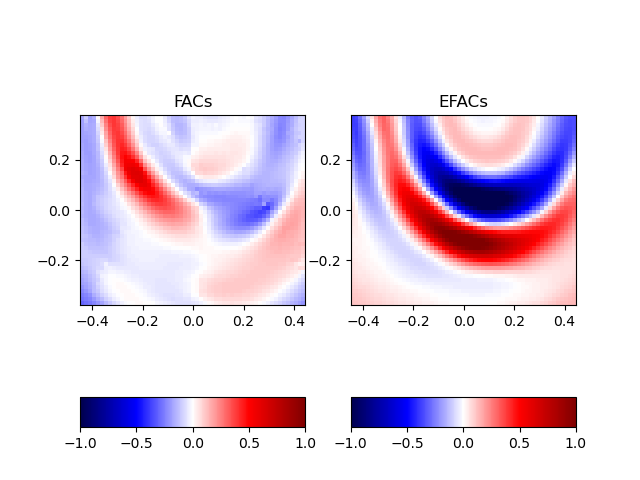

In [12]:
def onclick(fig, axes, cbars, event):
    cbar_bools= np.array([cbar.ax.in_axes(event) for cbar in cbars]) #Has True for which colour bar the click is in
    if any(cbar_bools):
        axis= np.array(axes)[cbar_bools][0] # Select the axis
        cbar= np.array(cbars)[cbar_bools][0] # Select the cbar
        ix, iy= event.xdata, event.ydata # Collect the click co-ordinates
        if cbar.orientation=='horizontal': #Check the orientation of the colour bar to find the limits
            crange=np.array(cbars)[cbar_bools][0].ax.get_xlim()
            coord= ix
        elif cbar.orientation=='vertical': #Check the orientation of the colour bar to find the limits
            crange=caxes[cbar_bools][0].ax.get_ylim() 
            coord= iy
        np.array(cbars)[cbar_bools][0].ax.clear()
        if coord<sum(crange)/2:
                axis.image.set_clim(coord, crange[-1])
        if coord>=sum(crange)/2:
                axis.image.set_clim(crange[0], coord)
    plt.draw() #makes the changes visible
    return

#Figure setup
fig5= plt.figure(num='Example 5')
gs= fig5.add_gridspec(2, 2, height_ratios=[1, .1])
ax6= fig5.add_subplot(gs[0, 0])
ax6.set_title('FACs')
ax6.set_aspect('equal')
ax7= fig5.add_subplot(gs[0, 1])
ax7.set_title('EFACs')
ax7.set_aspect('equal')
caxes= [fig5.add_subplot(gs[1, i]) for i in range(2)]

# Load dataset try and except is to combat whether user has the package xarray
try:
    from xarray import load_dataset
    ds= load_dataset('./Data/SECS_Amplitudes.ncdf')
    date= np.datetime64('2011-06-01T07:51')
    vals= (ds.sel(substorm_onset=date, epoch=20).Amplitude_cf/-ds.sel(substorm_onset=date, epoch=20).Grid_Area).values.T
    vals2= (ds.sel(substorm_onset=date, epoch=20).Amplitude_df/ds.sel(substorm_onset=date, epoch=20).Grid_Area).values.T
    x= ds.sel(substorm_onset=date, epoch=20).xi.values
    y= ds.sel(substorm_onset=date, epoch=20).eta.values
except ImportError:
    vals= np.loadtxt('./Data/Amplitude.txt')
    vals2= np.loadtxt('./Data/Amplitude2.txt')
    x= np.loadtxt('./Data/xi.txt')
    y= np.loadtxt('./Data/eta.txt')

#Creating the edges of the "pixels" for pcolormesh
diffx= np.diff(x)[0]
diffy= np.diff(y)[0]
x_mesh=np.append([x[0]-diffx/2], x+diffx/2)
y_mesh=np.append([y[0]-diffy/2], y+diffy/2)

#Adding the pcolormesh as an attribue image to the subplot for easy access later
ax6.image= ax6.pcolormesh(x_mesh, y_mesh, vals, cmap='seismic', vmin=-1, vmax= 1)
ax7.image= ax7.pcolormesh(x_mesh, y_mesh, vals2, cmap='seismic', vmin=-1, vmax= 1)

#Creating list of colour bars
cbars=[fig5.colorbar(ax6.image, cax=caxes[0], orientation='horizontal')]
#Adding to the list of colour bars
cbars.append(fig5.colorbar(ax7.image, cax=caxes[1], orientation='horizontal'))

onclick_wrapper=functools.partial(onclick, fig5,  [ax6, ax7], cbars) # Create the wrapper
cid = fig5.canvas.mpl_connect('button_press_event', onclick_wrapper) # Attach it to the click function in the figure